In [103]:
import pandas as pd

### Gerando Gráfico de Dispersão

In [112]:
df_repro = pd.read_csv("evento_reprodução.csv")
#transformando para tipo data
df_repro['data_ocorrencia_repro'] = pd.to_datetime(df_repro['data_ocorrencia_repro'])
df_repro.head()

,bin_to_uuid(a.animal_id),nome,data_nascimento,raca,categoria,sexo,data_ocorrencia_repro,reprodutividade
0,033438fa-c374-4ae9-92a8-d711da2a6866,17 biju,2024-04-14,H,N,F,NaT,NaN
1,1da6d154-a13b-44be-9339-8ae4b798c6ee,04 judi,2023-02-25,H,V,F,2024-11-07 19:33:00,PT
2,1da6d154-a13b-44be-9339-8ae4b798c6ee,04 judi,2023-02-25,H,V,F,2024-11-22 19:13:00,CI
3,1da6d154-a13b-44be-9339-8ae4b798c6ee,04 judi,2023-02-25,H,V,F,2024-02-05 20:16:00,IN
4,208d125f-2f3d-4053-a912-4ac7092c9e66,Xalana,2017-08-04,H,V,F,2024-09-12 13:35:00,IN


In [106]:
#averiguando os dados nulos
df_repro.isnull().sum()

bin_to_uuid(a.animal_id)     0
nome                         0
data_nascimento              0
raca                         0
categoria                    0
sexo                         0
data_ocorrencia_repro       13
reprodutividade             13
dtype: int64

In [75]:
df_re=df_repro.dropna()
#mudando para mês
df_re.loc[:,'data_ocorrencia_repro']=df_re.loc[:,'data_ocorrencia_repro'].dt.month
df3 = df_re[['data_ocorrencia_repro','reprodutividade']]

#agrupando as ocorrencias por mês
df3['ocorrencia'] = df3.groupby(['reprodutividade', df3['data_ocorrencia_repro']])['data_ocorrencia_repro'].transform('count')

df3=df3.drop_duplicates()
df3.head()

C:\Users\Paula Rehbein\AppData\Local\Temp\ipykernel_10444\4164722031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ocorrencia'] = df3.groupby(['reprodutividade', df3['data_ocorrencia_repro']])['data_ocorrencia_repro'].transform('count')


,data_ocorrencia_repro,reprodutividade,ocorrencia
1,11,PT,4
2,11,CI,4
3,2,IN,4
4,9,IN,8
8,7,IN,3


In [113]:
df3=df3.sort_values(by=['data_ocorrencia_repro'])

In [114]:
dfgraf3=df3.rename(columns={'data_ocorrencia_repro': 'Mês'})
dfgraf3.head()

,Mês,reprodutividade,ocorrencia
3,2,IN,4
33,2,PN,1
53,3,PN,1
54,3,IN,1
37,4,IN,2


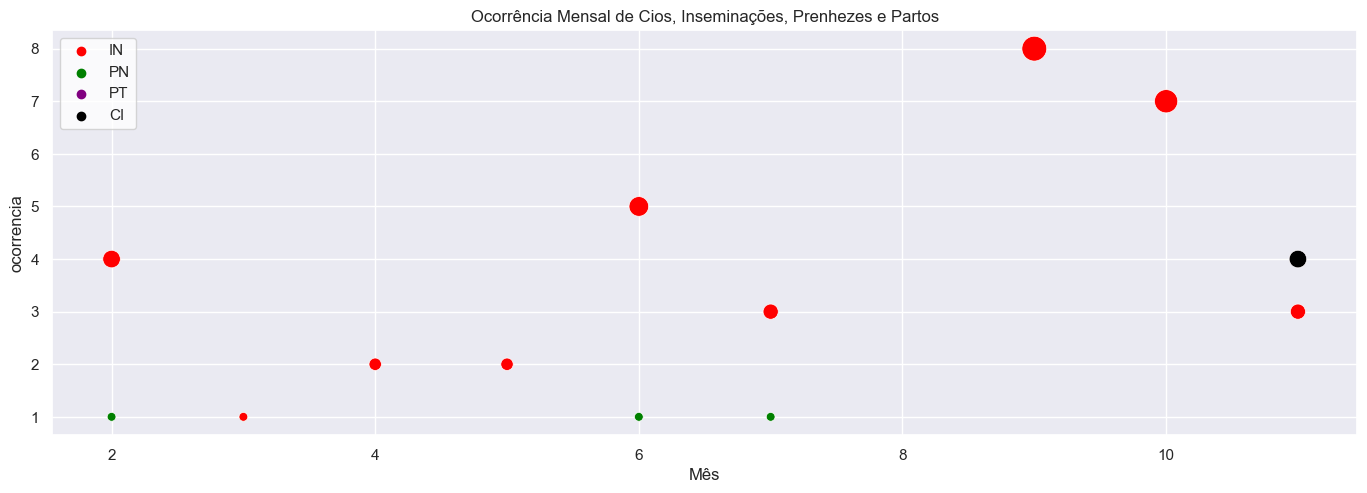

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o ambiente do gráfico 
sns.set(style='darkgrid')
#sns.set_style("white")
plt.figure(figsize=(15,5))

# Gráfico de Dispersão
scatter_plot = sns.scatterplot(x="Mês", 
                               y="ocorrencia", 
                               s=dfgraf3['ocorrencia']*40, 
                               hue='reprodutividade', 
                               palette={'IN': 'red', 
                                        'PT': 'purple', 
                                        'PN': 'green',
                                        'CI':'black'},
                    data=dfgraf3)

scatter_plot.legend(loc='upper left', facecolor='white')
plt.title('Ocorrência Mensal de Cios, Inseminações, Prenhezes e Partos')

plt.show()

### Gerando Gráfico de linhas

In [116]:
#novo df para um novo grafico
df2=dfgraf3
df2.head()

,Mês,reprodutividade,ocorrencia
3,2,IN,4
33,2,PN,1
53,3,PN,1
54,3,IN,1
37,4,IN,2


In [117]:
df2=df2.sort_values(by=['Mês'])

In [118]:
#separando em dataframes diferentes situação reprodutiva
dfPN = df2.loc[df2['reprodutividade'].isin(['PN'])]
dfPT = df2.loc[df2['reprodutividade'].isin(['PT'])]
dfIN = df2.loc[df2['reprodutividade'].isin(['IN'])]
dfCI = df2.loc[df2['reprodutividade'].isin(['CI'])]

In [ ]:
dfCI = dfCI.set_index('CI').T
dfPT = dfPT.set_index('PT').T
dfPN = dfPN.set_index('PN').T
dfIN = dfIN.set_index('IN').T

In [120]:
dfCI=dfCI.sort_values(by=['Mês'])

In [121]:
dfPT=dfPT.sort_values(by=['Mês'])

In [122]:
dfIN= dfIN.sort_values(by=['Mês'])

In [123]:
dfPN=dfPN.sort_values(by=['Mês'])

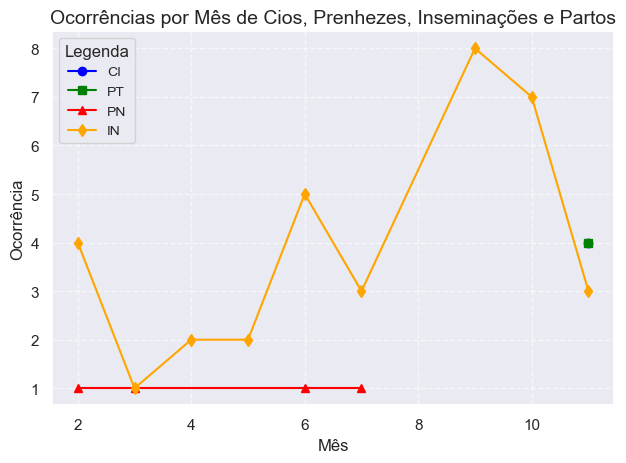

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que dfCI, dfPT, dfPN, dfIN sejam DataFrames contendo colunas 'Mês' e 'ocorrencia'.
# Certifique-se de que as variáveis correspondam ao que você tem no seu código.

# Criar o gráfico de linhas com cores distintas para cada conjunto de dados
plt.plot(dfCI['Mês'], dfCI['ocorrencia'], label='CI', color='blue', marker='o')
plt.plot(dfPT['Mês'], dfPT['ocorrencia'], label='PT', color='green', marker='s')
plt.plot(dfPN['Mês'], dfPN['ocorrencia'], label='PN', color='red', marker='^')
plt.plot(dfIN['Mês'], dfIN['ocorrencia'], label='IN', color='orange', marker='d')

# Adicionar rótulos e legenda
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Ocorrência', fontsize=12)
plt.title('Ocorrências por Mês de Cios, Prenhezes, Inseminações e Partos', fontsize=14)
plt.legend(title='Legenda', fontsize=10)

# Mostrar o gráfico
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
